In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import kendalltau,pearsonr,spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
data=pd.read_csv('/kaggle/input/lerniar-regression-data/LR_dataset.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#checking the data types
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


From the above we can know that there are not having null values and serial number seems to be unique value/identifier we have further more inspect the SOP,LOR,CGPA,research cols since they seems having descreate values

In [7]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [8]:
data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [9]:
data['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

In [10]:
data['CGPA'].value_counts()

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: CGPA, Length: 184, dtype: int64

In [11]:
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

Frome the above analysis we can understand that Research,LOR,SOP,University Rating are all descrete ordinal values and CGPA is continous where its values are goes maximum 10

# Univarient analysis

In [12]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


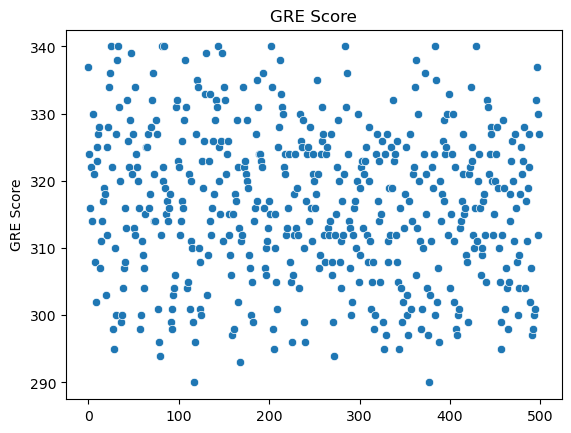

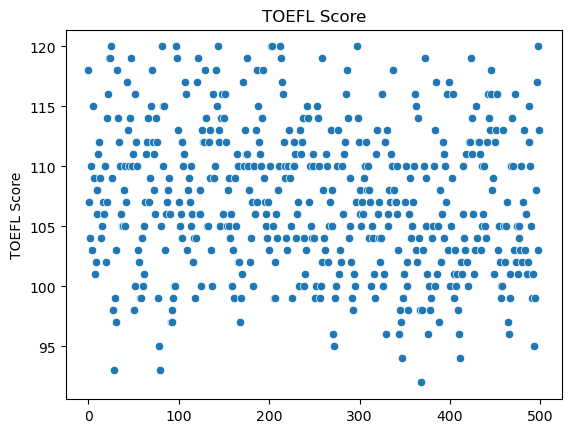

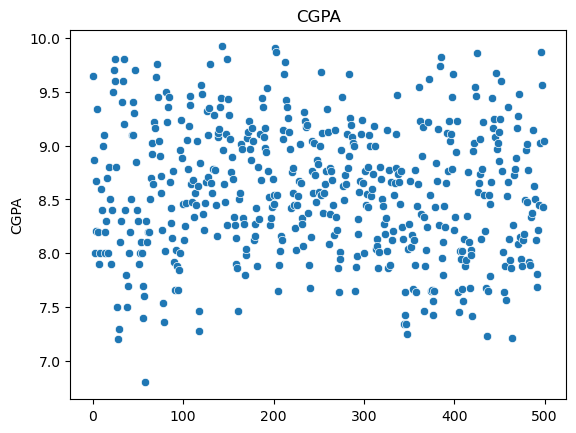

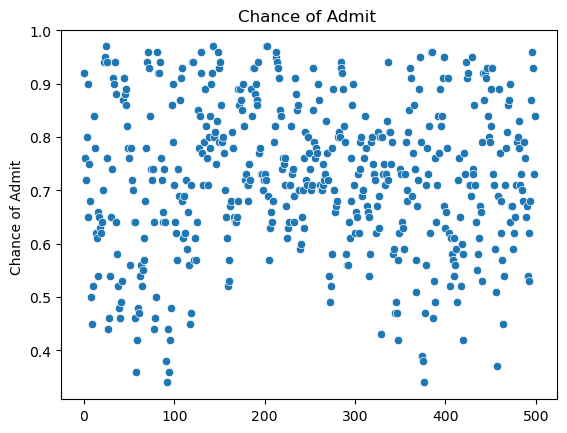

In [13]:
for i in ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']:
    sns.scatterplot(data=data[i])
    plt.title(i)
    plt.show()

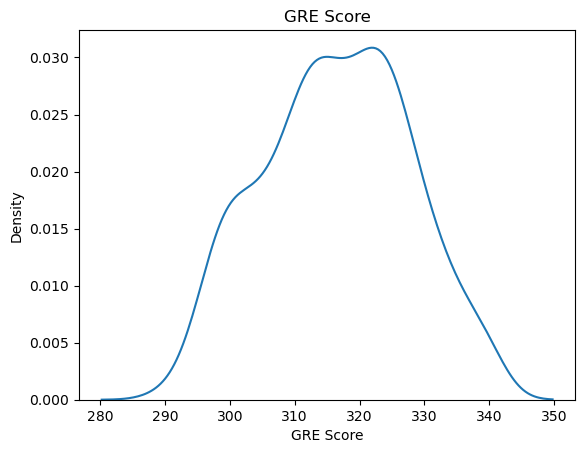

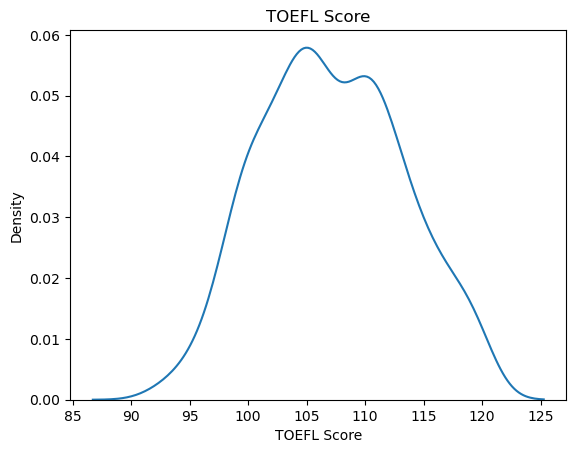

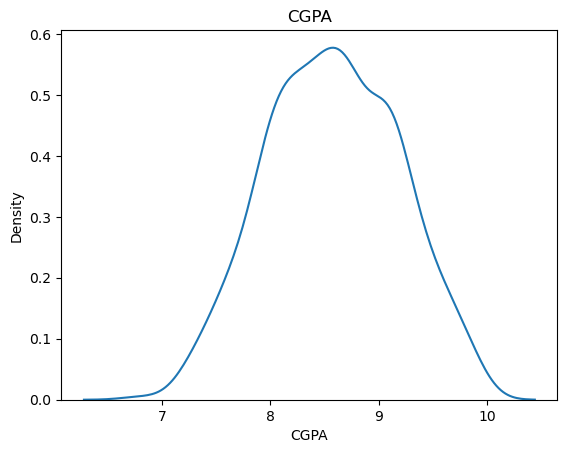

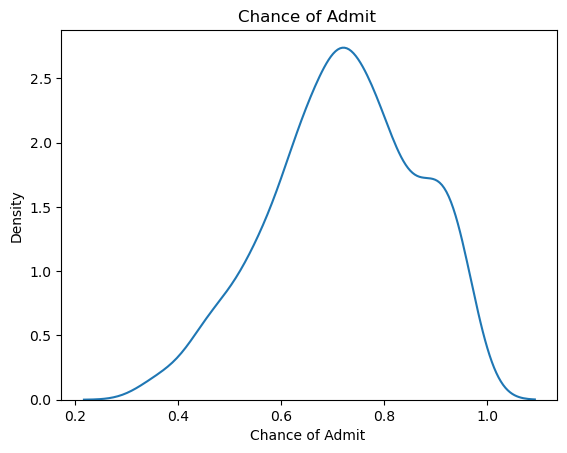

In [14]:
for i in ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']:
    sns.kdeplot(data=data[i])
    plt.title(i)
    plt.show()

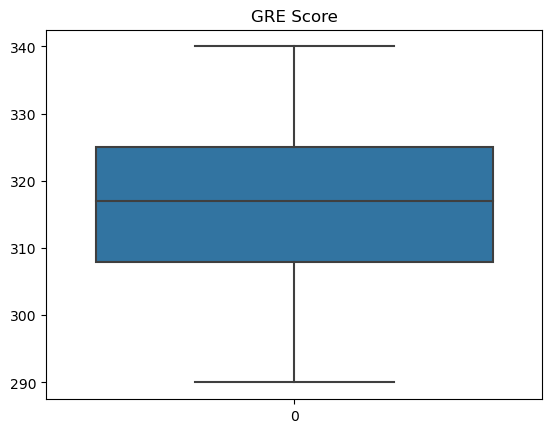

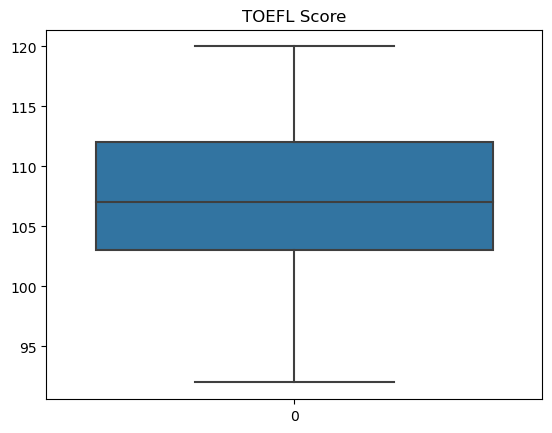

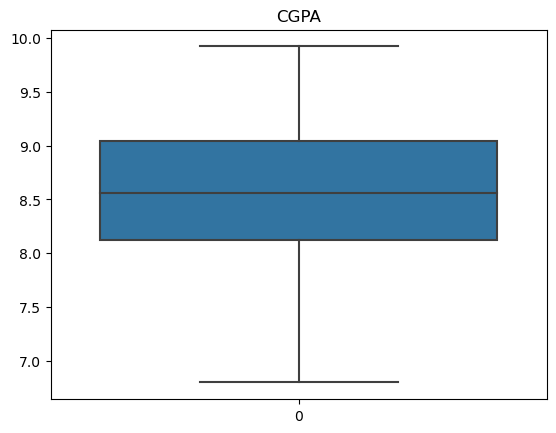

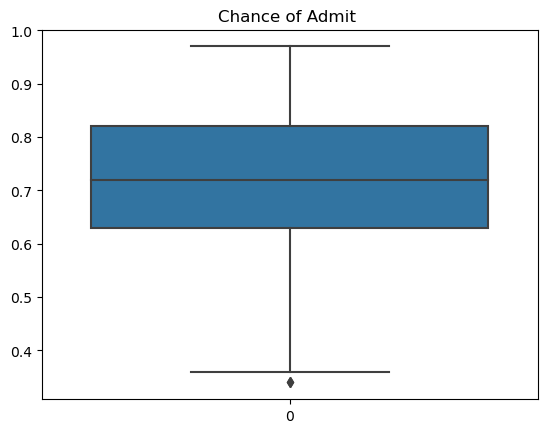

In [15]:
for i in ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']:
    sns.boxplot(data=data[i])
    plt.title(i)
    plt.show()

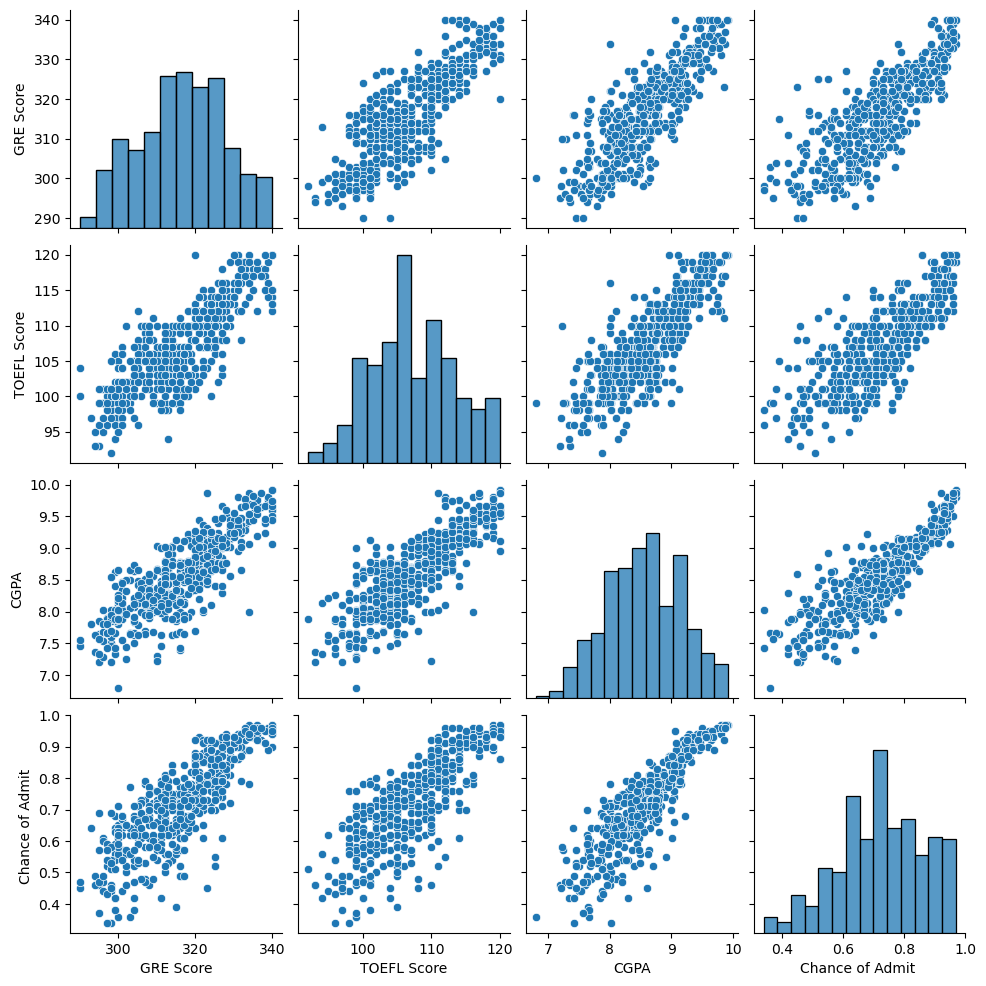

In [16]:
sns.pairplot(data[['GRE Score','TOEFL Score','CGPA','Chance of Admit ']])
plt.show()

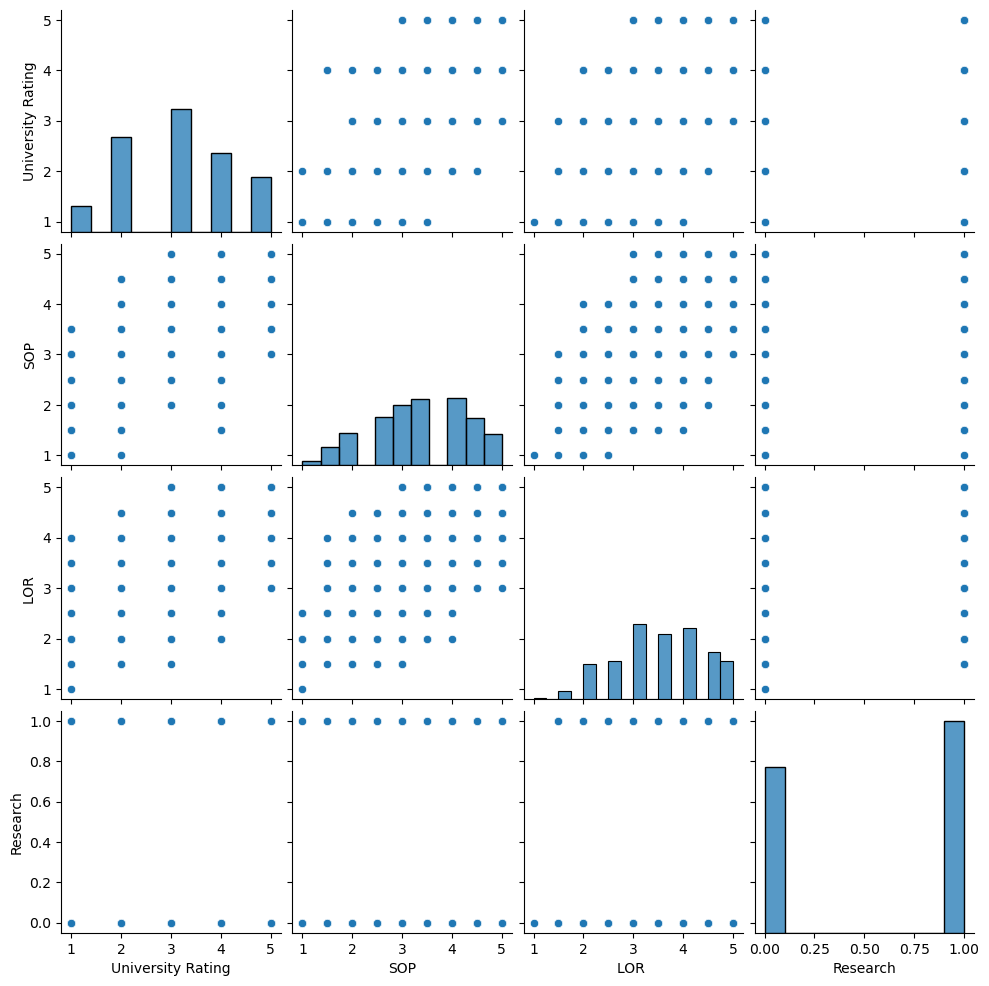

In [17]:
sns.pairplot(data[['University Rating','SOP','LOR ','Research']])
plt.show()

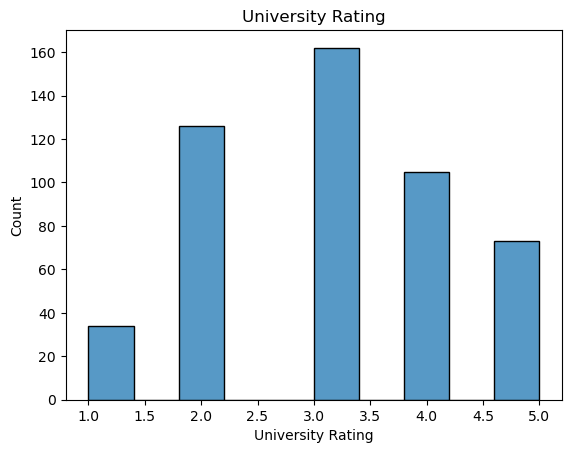

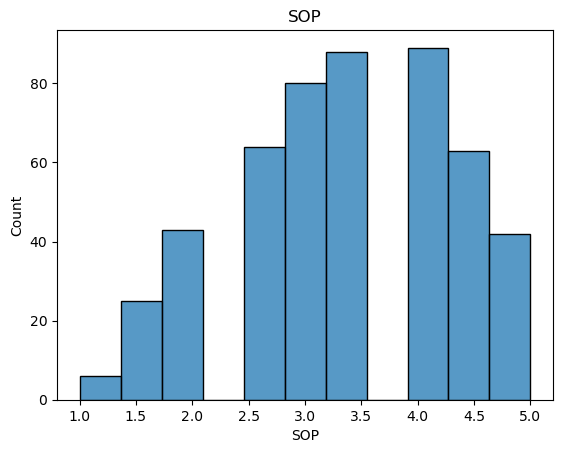

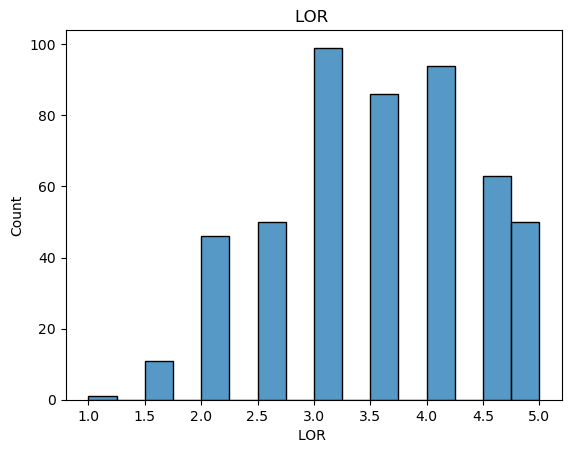

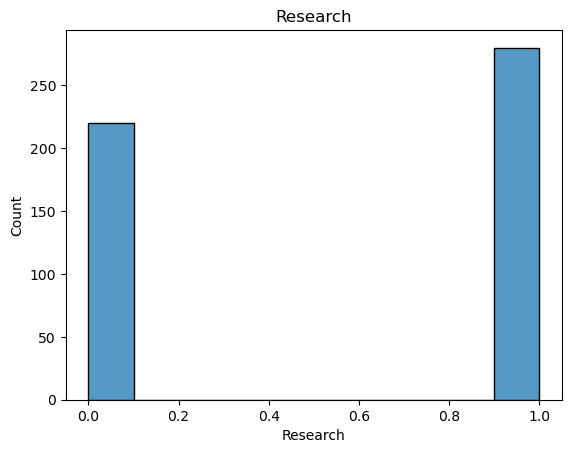

In [18]:
for i in ['University Rating','SOP','LOR ','Research']:
    sns.histplot(data[i])
    plt.title(i)
    plt.show()

From the above qualatitative analysis we can see the following things:
* the relation ship between the continous variables is mostly leniar
* continous variables are almost normally distributed
* there are no outliers in the data
* in the cat variables  "universtit variable" most of the data is around 2,3.5 and 4
* in the SOP the data is highest for the rating ragter than 2.5 and less than 5
* in LOR the highest data distribution is in between 3.5 to 4.5
* for the research data is almost equally distributed

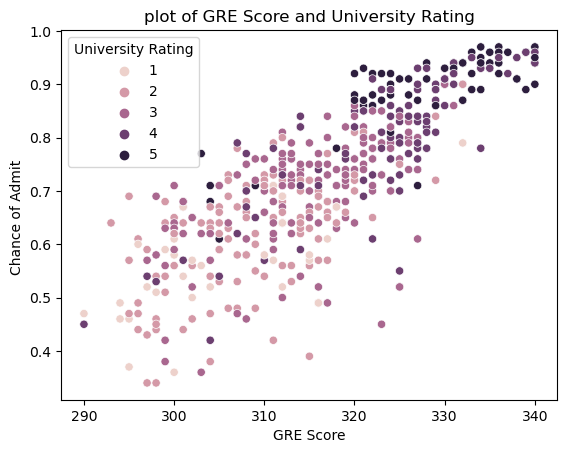

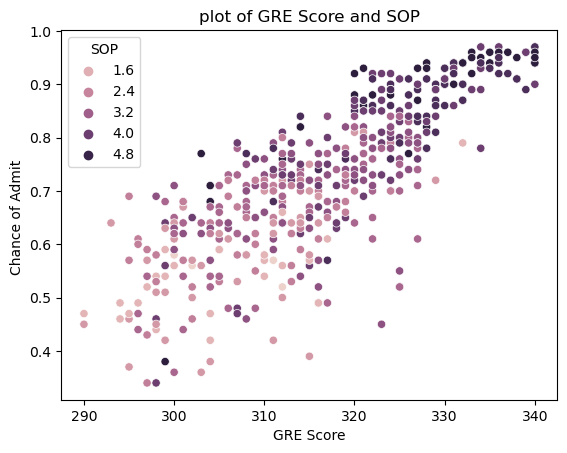

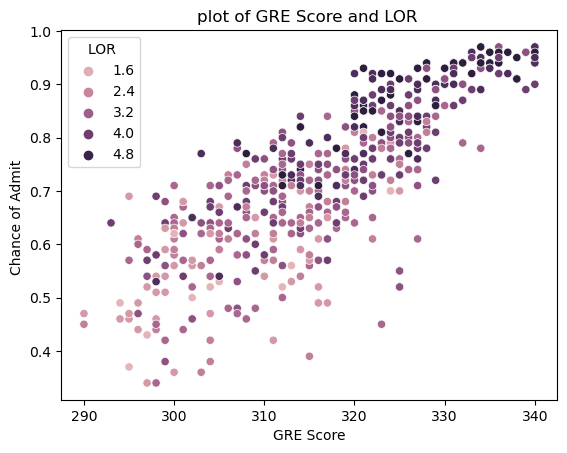

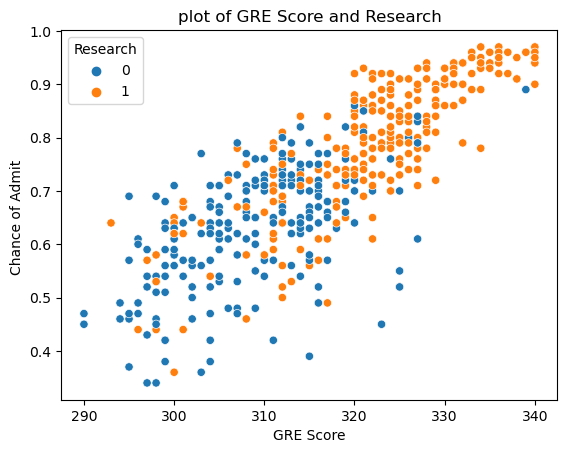

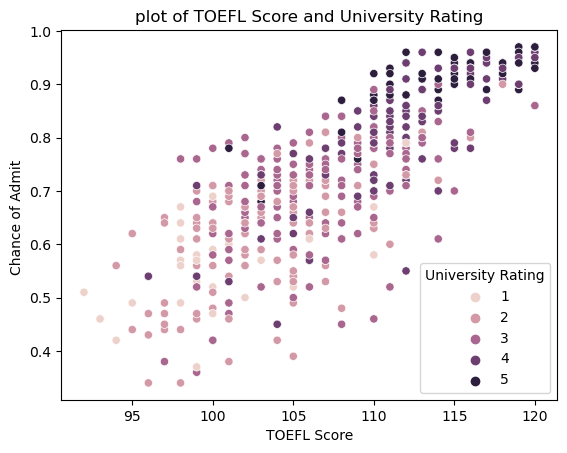

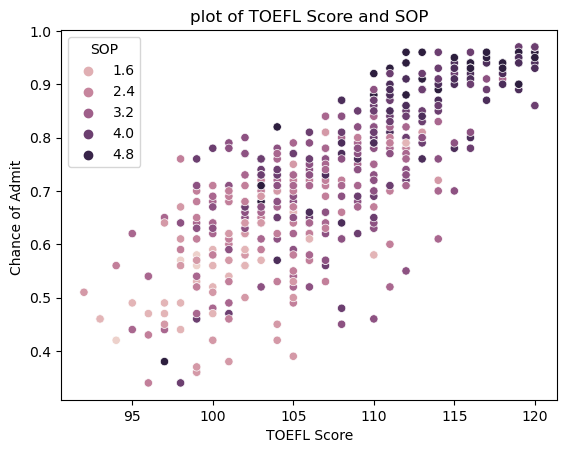

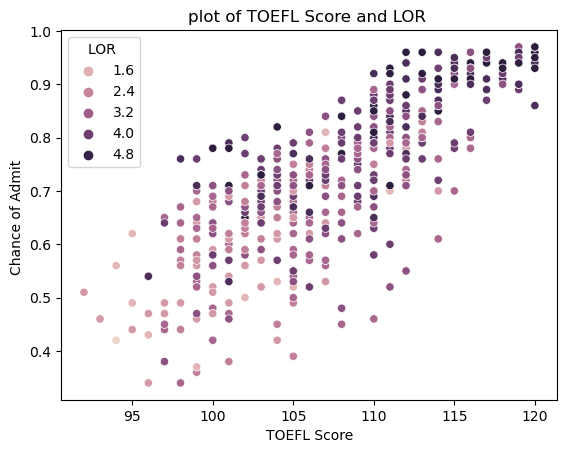

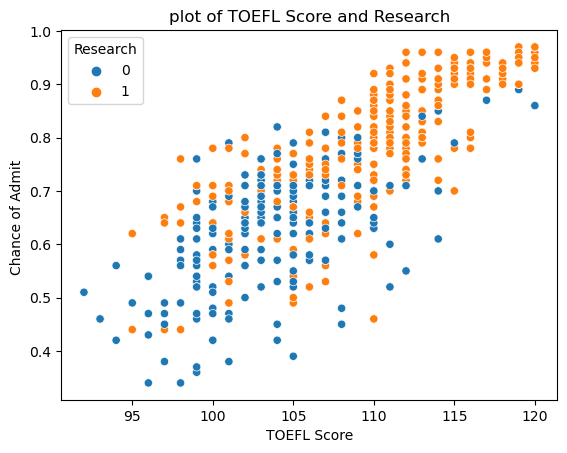

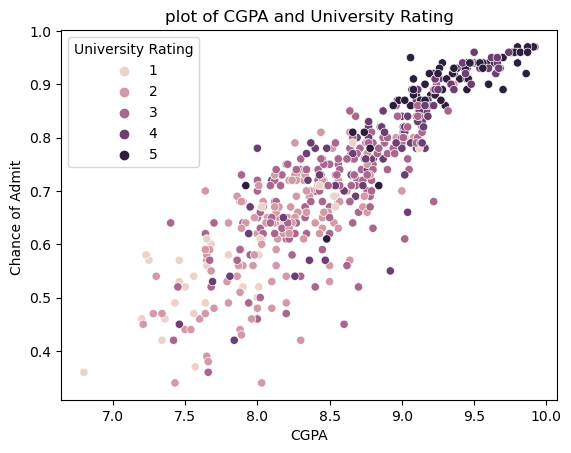

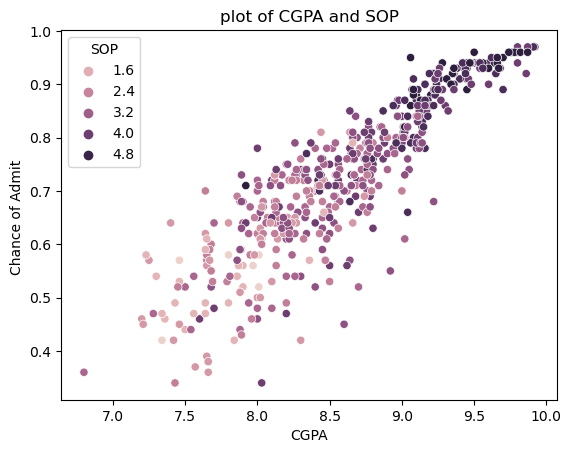

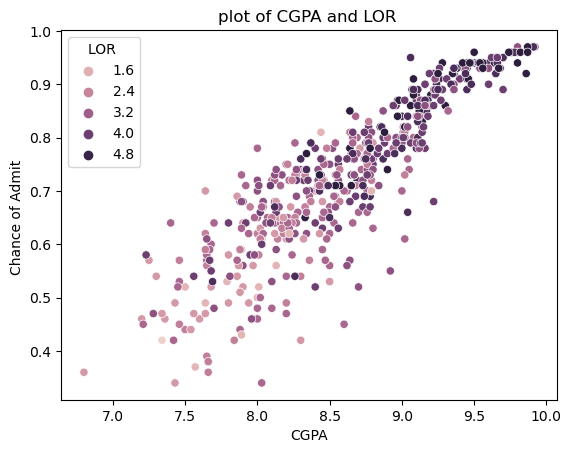

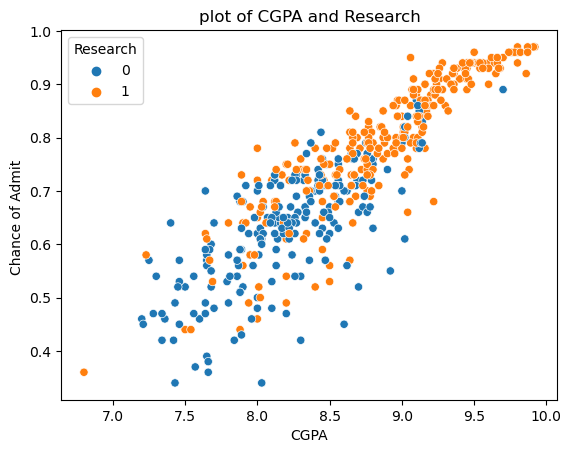

In [19]:
#scatter plots for the finding the relationship between the each catagorical variable continous variable
# target variabel
for i in ['GRE Score','TOEFL Score','CGPA']:
    for j in ['University Rating','SOP','LOR ','Research']:
        sns.scatterplot(data=data, x=i, y="Chance of Admit ", hue=j)
        plt.title('plot of '+i+' and '+j)
        plt.show()

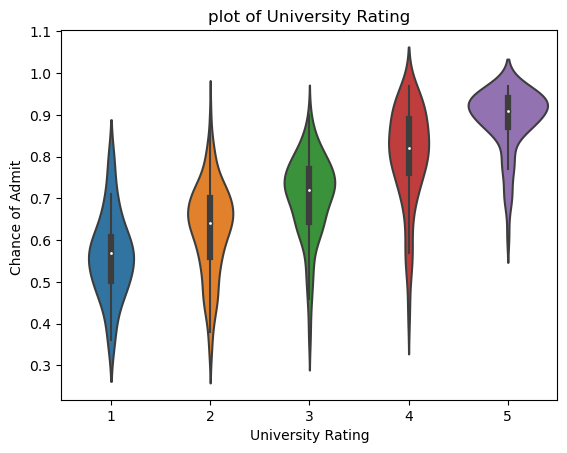

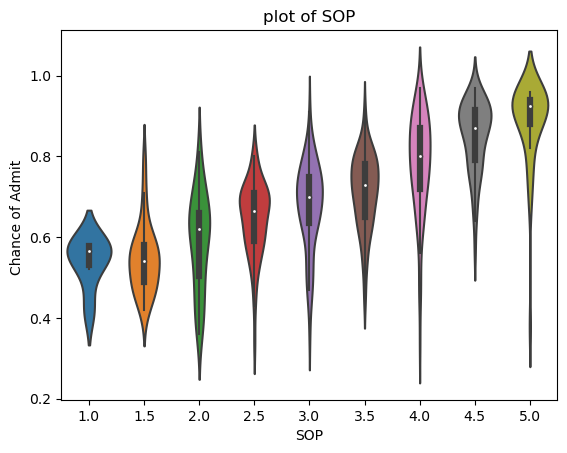

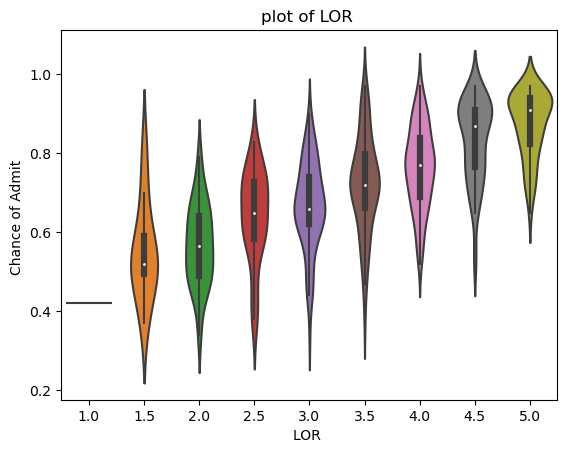

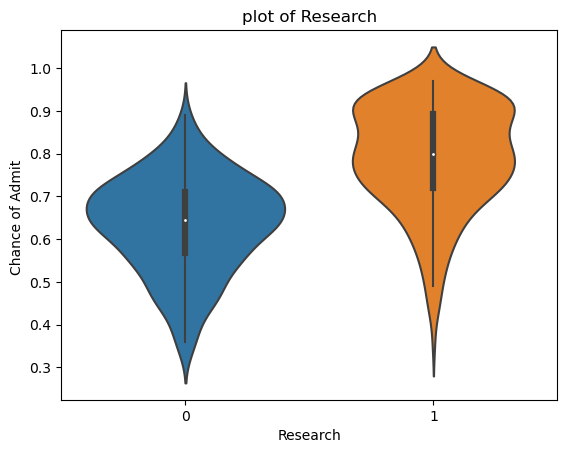

In [20]:
for j in ['University Rating','SOP','LOR ','Research']:
        sns.violinplot(data=data, x=j, y="Chance of Admit ")
        plt.title('plot of '+j)
        plt.show()

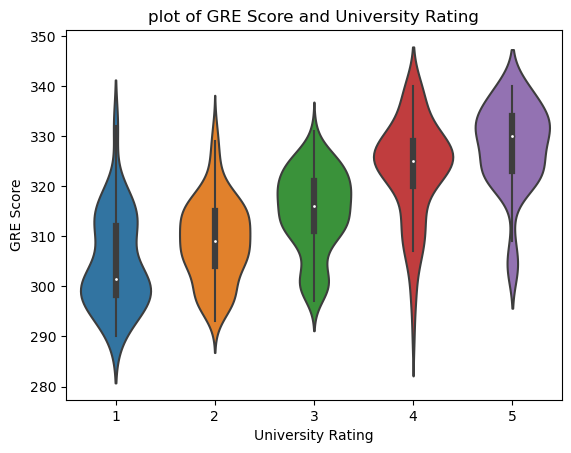

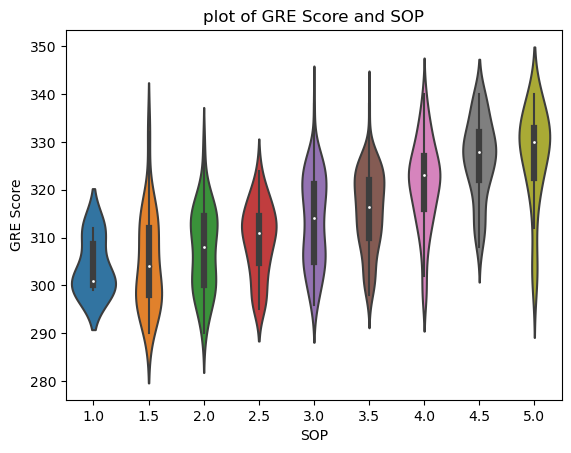

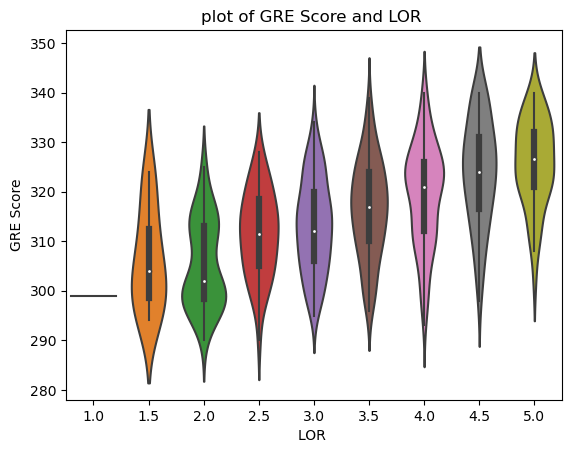

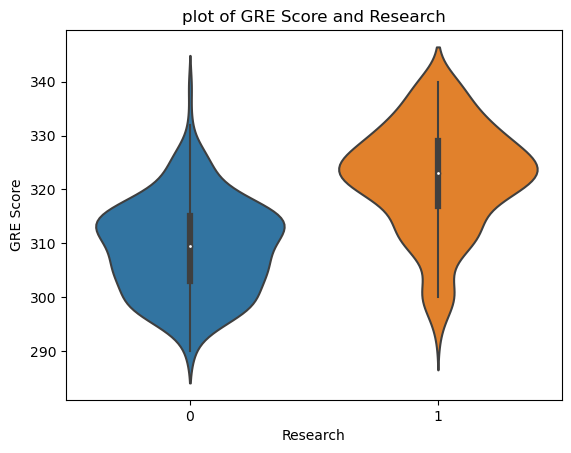

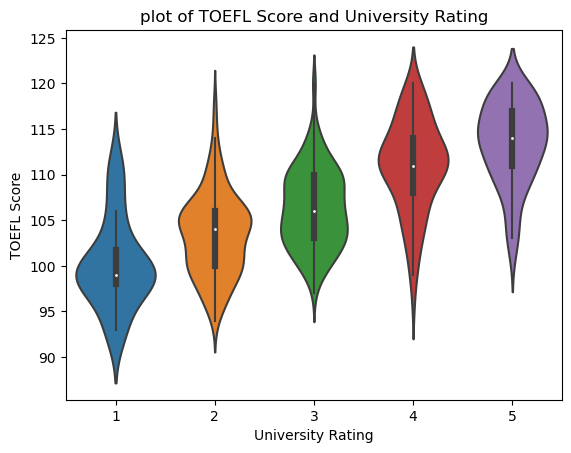

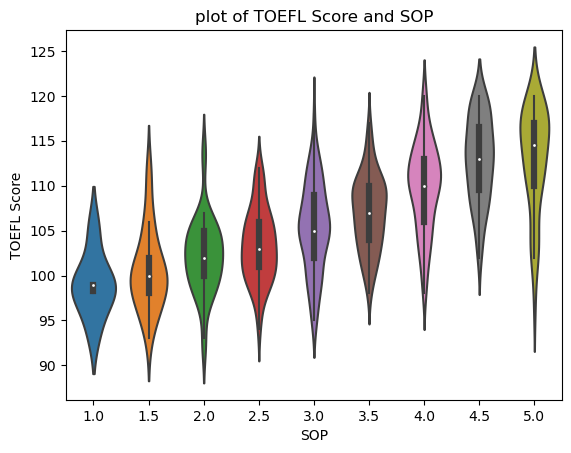

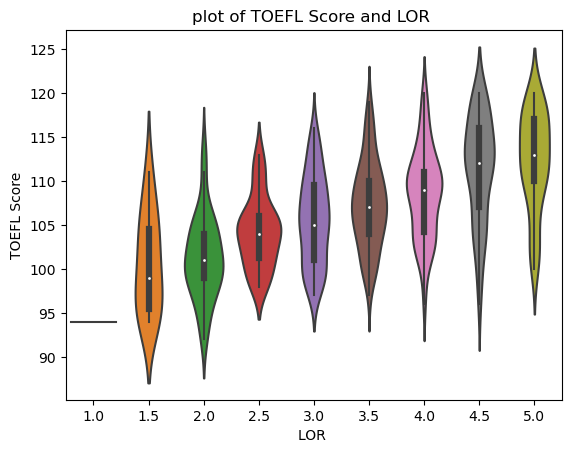

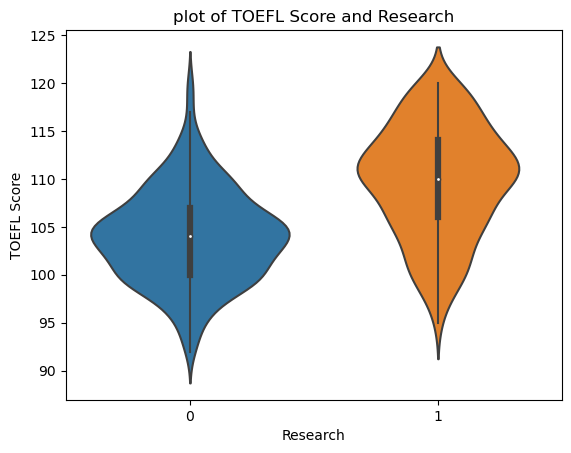

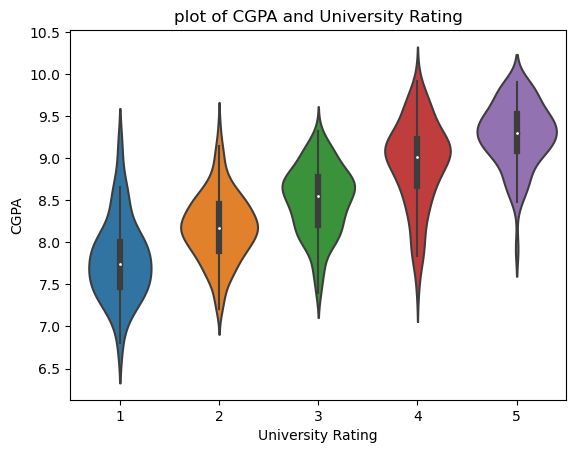

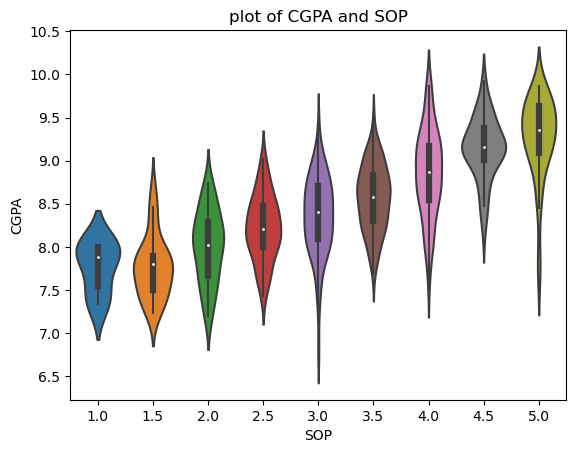

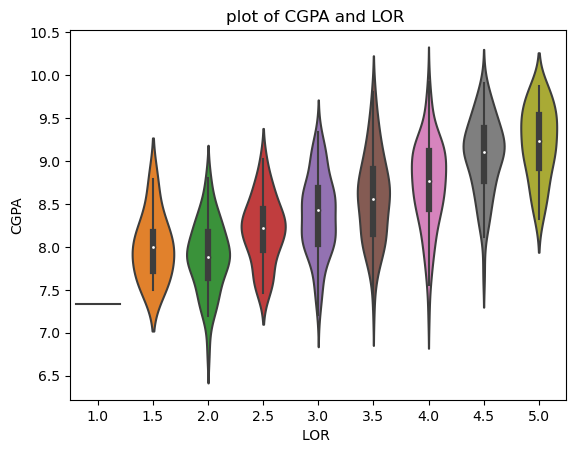

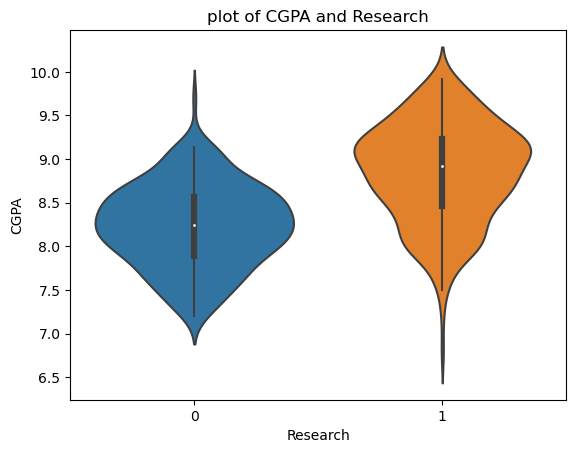

In [21]:
for i in ['GRE Score','TOEFL Score','CGPA']:
    for j in ['University Rating','SOP','LOR ','Research']:
        sns.violinplot(data=data, x=j, y=i)
        plt.title('plot of '+i+' and '+j)
        plt.show()

From the above bivarient analysis we can get several insights such as:
1. Scatter Plot
    *  higher CGPA,TOFEL,GRE score with high university rank,high LOR, High SOP with resaerch have
       high chance of getting into the ivy legues
    *  If CGPA is high the LOR rating is also high 
    *  Even though the TOfel score is low the LOR is high is many cases 
   
2. in the violen plot where we plotted each catagory variable agaianet the target variable:
    * university rating higher than 3.5 having higher chance of acceptence
    * higher SOP i.e garter than 3.5 will have high acceptence
    * Higher LOR i.e, >3.5 will have high chnces
    * Having a research paper will have high chnace of acceptence
    
If you see the third plot everything this is linear relationship i.e, higher score higher ratings that makes intitu sense if the profile is strong then the high chance of getting admission in the ivy legues

# Corelation check

In [22]:
data.drop('Serial No.',inplace=True,axis=1)

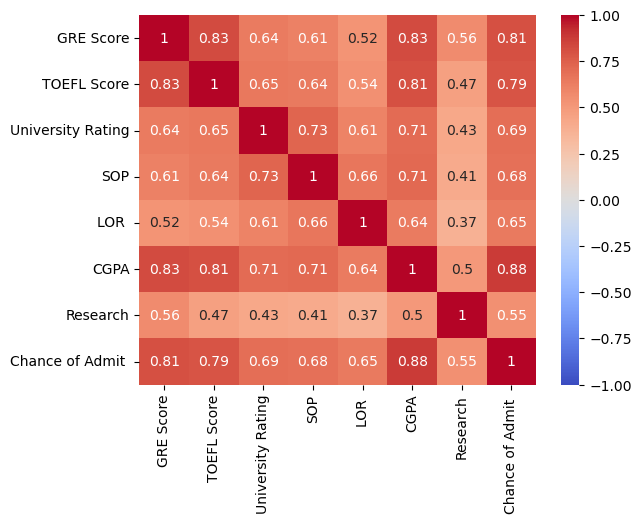

In [23]:
corelation_matrix=np.zeros((data.shape[1],data.shape[1]))
list_of_cols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        corr,_=pearsonr(data.iloc[:,i],data.iloc[:,j])
        corelation_matrix[i,j]=corr
        corelation_matrix[j,i]=corr
        
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(np.arange(data.shape[1])+0.5,list_of_cols ,rotation=90)
plt.yticks(np.arange(data.shape[1])+0.5,list_of_cols ,rotation=360)
plt.show()

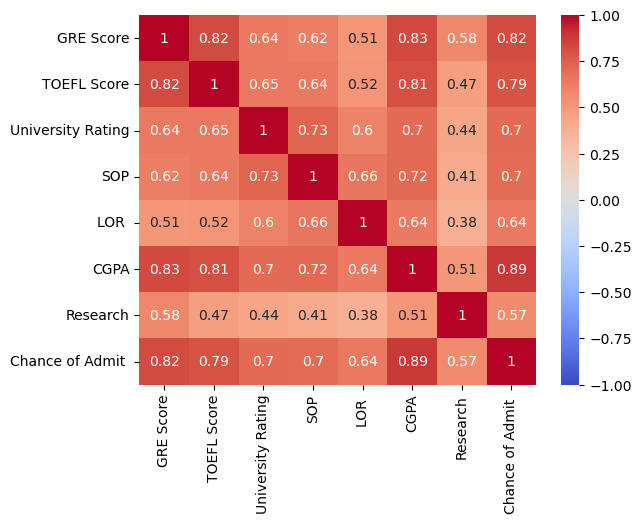

In [24]:
corelation_matrix=np.zeros((data.shape[1],data.shape[1]))
list_of_cols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        corr,_=spearmanr(data.iloc[:,i],data.iloc[:,j])
        corelation_matrix[i,j]=corr
        corelation_matrix[j,i]=corr
        
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(np.arange(data.shape[1])+0.5,list_of_cols ,rotation=90)
plt.yticks(np.arange(data.shape[1])+0.5,list_of_cols ,rotation=360)
plt.show()

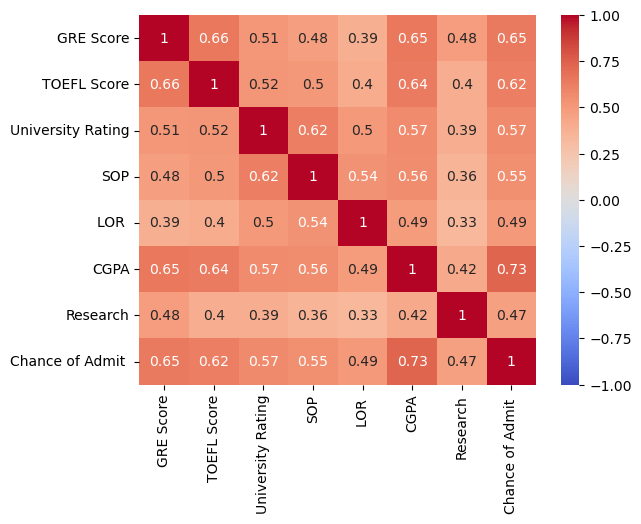

In [25]:
corelation_matrix=np.zeros((data.shape[1],data.shape[1]))
list_of_cols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        corr,_=kendalltau(data.iloc[:,i],data.iloc[:,j])
        corelation_matrix[i,j]=corr
        corelation_matrix[j,i]=corr
        
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(np.arange(data.shape[1])+0.5,list_of_cols ,rotation=90)
plt.yticks(np.arange(data.shape[1])+0.5,list_of_cols ,rotation=360)
plt.show()

From the above co relation matrics there is a strong positive relationship between the CGAP,GRE Score,Toffel Score so either we can reomve one of the variable here or we can try to fit the model and reomve or retain depending on the model simplicity

Different types of correlation coefficients are suitable for different types of data and research questions. Here's a summary of when to use each type of correlation:

1. Pearson's correlation coefficient:

Use when both variables are continuous and follow a roughly linear relationship.
Measures the strength and direction of a linear relationship between variables.
Assumes that the variables are normally distributed and have a linear association.

2. Spearman's rank correlation coefficient:

Use when one or both variables are ordinal or when the relationship is non-linear.
Measures the monotonic relationship (i.e., the direction and strength of the relationship, regardless of linearity).
Does not assume a specific distribution of the variables.

3. Kendall's rank correlation coefficient:

Use when one or both variables are ordinal or when the relationship is non-linear.
Measures the strength and direction of the relationship, considering the concordant and discordant pairs of ranks.
Does not assume a specific distribution of the variables.

4. Point-Biserial correlation coefficient:

Use when one variable is continuous and the other is binary.
Measures the strength and direction of the relationship between a continuous variable and a binary variable.

5. Rank-Biserial correlation coefficient:

Use when one variable is continuous and the other is ordinal.
Measures the strength and direction of the relationship between a continuous variable and an ordinal variable.

# Pre Processing steps

In [26]:
X=data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]
y=data['Chance of Admit ']

In [27]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)

X=data_scaled[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

Training set - X: (400, 7) y: (400,)
Testing set - X: (100, 7) y: (100,)


# Model Training

In [29]:
model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import r2_score

print('R-Square: ',r2_score(y_test,y_pred))
adjusted_rsq=1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted_rsq: ',adjusted_rsq)

R-Square:  0.8188432567829629
adjusted_rsq:  0.8050595915381884
